In [3]:
import time
import requests
import scrapy
import re
import urllib3 as urllib
from bs4 import BeautifulSoup as bs
import os


In [ ]:
url = 'https://www.zhihu.com/api/v4/questions/510029432/answers?'
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36'
}
re_pattern = re.compile('[_|\d|a-zA-Z]+\.jpg')

In [52]:
def download_img(img_urls, header):
    for img_url in img_urls:
        r = requests.get(img_url, headers=header, stream=True)
        if r.status_code == 200:
            img_name = re_pattern.findall(img_url)
            assert len(img_name) == 1, '图片名称错误'
            open('D:/desktop/zhihu/{}'.format(img_name[0]), 'wb').write(r.content)  # 将内容写入图片
    print("done")


def get_zhihu_answers(page, ans):
    params = {
        "include": "data[*].is_normal,admin_closed_comment,reward_info,is_collapsed,annotation_action,annotation_detail,collapse_reason,is_sticky,collapsed_by,suggest_edit,comment_count,can_comment,content,editable_content,attachment,voteup_count,reshipment_settings,comment_permission,created_time,updated_time,review_info,relevant_info,question,excerpt,is_labeled,paid_info,paid_info_content,relationship.is_authorized,is_author,voting,is_thanked,is_nothelp,is_recognized;data[*].mark_infos[*].url;data[*].author.follower_count,vip_info,badge[*].topics;data[*].settings.table_of_content.enabled",
        "limit": "5",
        "offset": page * 5,
        "platform": "desktop",
        "sort_by": "default"
    }
    r = requests.get(url, headers=headers, params=params).json()
    for data in r['data']:
        content = data['content']
        soup = bs(content, 'html')
        txt = soup.get_text()
        img_urls = []
        for img in soup.find_all('img'):
            try:
                img_url = img.attrs['data-original']
                img_urls.append(img_url)
            except KeyError:
                continue
        download_img(img_urls, headers)
        name = data['author']['name']
        like = data['voteup_count']
        print('name: {}--like: {}--txt: {}'.format(name, like, txt))
        ans.append({'name': name, 'like': like, 'txt': txt})
    print('-' * 20)
    return ans


ans = []
get_zhihu_answers(1, ans)

done
name: 江夏周闪光--like: 453--txt: 谢谢高赞申诉入口，已冲！大家冲呀！申诉信件如下：Tips：提交部门我看了一下相关职责，选的是“网络视听节目管理司”不知道对不对，如有错误请大佬指正，我重新提交一遍～更新：感谢评论区小伙伴提醒，网络游戏好像不归广电局管了，需要反馈到国务院新闻出版署，链接如下国务院“互联网+督查”平台_中国政府网先注册登陆-点击“我要留言”-选择“人民群众反映问题通道”-填写标题和内容（限400字）-问题归属选择国务院部门（新闻出版署）尊敬的新闻出版署工作人员，你好。我是一名普通的《原神》玩家，最近游戏版本更新我注意到原神游戏部分角色的外观建模被强制仓促修改，对此我持反对意见，理由如下：1、对于此次修改的4名角色外观以及后续可能会修改的角色建模，侵犯了我作为消费者的合法权利，我当初是为了原本建模投入了一定的资金和成本，在未经协商的情况下，强制修改商品属性，明显违反了《中华人民共和国消费者权益保护法》中的第九条、第十一条等相关消费者权利，希望此次强制修改能拿出相对应的法律条款和条例，依法治国不应只成为一句口号！2、我个人不认为修改角色的原本建模存在任何违法违规的地方，如果有，请拿出相关法律条文说明。原建模凝聚了大量游戏劳动工作者的心血，并且得到了绝大部分玩家的认可和喜爱，是富有美感、积极向上的虚拟艺术品类，与淫秽色情相去甚远。相比较其他游戏、雕塑、绘画艺术等表达形式，《原神》游戏作为一款12+游戏，在对于青少年的引导上一直非常关注，对于此次改动，我作为普通玩家的感情收到了极大伤害。3、《原神》作为一款在全世界范围内较为成功的游戏作品，在一定程度上承担起了部分文化传播的责任，自游戏上线以来，在全世界范围内掀起了关于中国文化和元素的积极讨论，让很多友善的国外朋友对中国更加感兴趣和了解，促进了文化交流和沟通，起到了非常积极的作用。本次改动只涉及到国内服务器，国际服务器并无改动，这种行为会进一步加强其他国家人民对我国的意识形态偏见，不利于我国的国际影响力和文化软实力的塑造。还请贵司考虑本人的诉求，撤销本次修改，并针对恶意举报行为进行严惩！不胜感激！
done
name: 匿名用户--like: 271--txt: 有的人的回答就离谱，大家戏称的“奶香剑”只是单纯地从心中拔出来剑作为大招释放，如果这也算不和谐的话，抗日神剧里的裤裆

[{'name': '江夏周闪光',
  'like': 453,
  'txt': '谢谢高赞申诉入口，已冲！大家冲呀！申诉信件如下：Tips：提交部门我看了一下相关职责，选的是“网络视听节目管理司”不知道对不对，如有错误请大佬指正，我重新提交一遍～更新：感谢评论区小伙伴提醒，网络游戏好像不归广电局管了，需要反馈到国务院新闻出版署，链接如下国务院“互联网+督查”平台_中国政府网先注册登陆-点击“我要留言”-选择“人民群众反映问题通道”-填写标题和内容（限400字）-问题归属选择国务院部门（新闻出版署）尊敬的新闻出版署工作人员，你好。我是一名普通的《原神》玩家，最近游戏版本更新我注意到原神游戏部分角色的外观建模被强制仓促修改，对此我持反对意见，理由如下：1、对于此次修改的4名角色外观以及后续可能会修改的角色建模，侵犯了我作为消费者的合法权利，我当初是为了原本建模投入了一定的资金和成本，在未经协商的情况下，强制修改商品属性，明显违反了《中华人民共和国消费者权益保护法》中的第九条、第十一条等相关消费者权利，希望此次强制修改能拿出相对应的法律条款和条例，依法治国不应只成为一句口号！2、我个人不认为修改角色的原本建模存在任何违法违规的地方，如果有，请拿出相关法律条文说明。原建模凝聚了大量游戏劳动工作者的心血，并且得到了绝大部分玩家的认可和喜爱，是富有美感、积极向上的虚拟艺术品类，与淫秽色情相去甚远。相比较其他游戏、雕塑、绘画艺术等表达形式，《原神》游戏作为一款12+游戏，在对于青少年的引导上一直非常关注，对于此次改动，我作为普通玩家的感情收到了极大伤害。3、《原神》作为一款在全世界范围内较为成功的游戏作品，在一定程度上承担起了部分文化传播的责任，自游戏上线以来，在全世界范围内掀起了关于中国文化和元素的积极讨论，让很多友善的国外朋友对中国更加感兴趣和了解，促进了文化交流和沟通，起到了非常积极的作用。本次改动只涉及到国内服务器，国际服务器并无改动，这种行为会进一步加强其他国家人民对我国的意识形态偏见，不利于我国的国际影响力和文化软实力的塑造。还请贵司考虑本人的诉求，撤销本次修改，并针对恶意举报行为进行严惩！不胜感激！'},
 {'name': '匿名用户',
  'like': 271,
  'txt': '有的人的回答就离谱，大家戏称的“奶香剑”只是单纯地从心中拔出来剑作为大

In [53]:
ans = []
for i in range(10):
    get_zhihu_answers(i, ans)
    time.sleep(2)

done
name: 典膳--like: 1061--txt: 申诉请到国务院反馈国务院“互联网+督查”平台_中国政府网，问题归属勾选国务院部门后选择国家新闻出版署（国家版权局），地方不需要勾选，然后填写你的申诉内容即可。现阶段广电无权干预游戏审核，请到国务院出版署进行申诉反馈。我不知道该怎么写比较好但我认为至少不能往因为角色服装怎么怎么样和审核合不合理上面靠，放个我申诉的在下面，希望能起到一些参考价值或者得到高人指点。您好，2022年1月5日国内游戏公司米哈游旗下游戏《原神》因审核要求进行了对人物模型及衣着的无奈整改，对此一事我恳请贵局可以撤销该要求。原神作为现中国文化传播娱乐面的重要媒介，极大的鼓舞了这一代年轻人的爱国情怀，此决定不但在国际层面对中国外宣形象造成了“为外媒正名中国刻板印象不是我们在说谎”以及严重打击了年轻一代人对祖国热烈爱国之心的重大影响，而且也扼杀了文娱创作人的一颗赤子心。现如今网络环境十分糟糕，有些许部分人或商业竞争公司进行莫须有的恶意举报，郑重希望贵局能够受理大众的声音，不让一些对中国未来怀揣恶意的人得逞。谢谢！
done
name: 单辞梢--like: 7783--txt: 我改了一份申诉，我听说下架的主要原因是因为举报的人比较多，但是如果申诉的人远多于举报的人广电会考虑改回来的（参考迪迦奥特曼重新上架）。如果有和我一样希望原皮保留的朋友可以试着申诉一下，毕竟举报和申诉都是我们作为中华人民共和国公民的合法公民权益。也请大家不要举报其他人，冤冤相报何时了啊，我们申诉自己的就行了。广电留言链接：互动管理平台系统信件标题：比如说，关于《原神》被无故强制修改角色建模的反对意见（不要和我写一模一样，改一下会容易通过）信件内容：尊敬的国家广播电视总局，我对于近期贵司使原神游戏修改部分角色（莫娜，罗莎莉亚，安柏，琴）建模提出申诉。首先，强制修改角色建模侵犯了我作为消费者的权益。我在购买角色时角色为原本建模，我因为对角色原版建模的喜爱而付费，贵司的此次改动实则降低了游戏公司产品的信任度，损害了为游戏付费的消费者的利益。其次，贵司的改动挤压了创作者的空间。原神作为少有的在海外收入占70%、影响力巨大的出海游戏，此次改动也会引起海外玩家的不满。原神是很多海外玩家对于中国游戏的第一印象，本次改动更会降低了中国游戏的海外竞争力，进而使得国外消费者对中国游戏产生

In [5]:
import pandas as pd

df = pd.DataFrame()
for i, a in enumerate(ans):
    s = pd.Series(a)
    df[i] = s
df.to_excel("D:/desktop/zhihu-spider-ans.xlsx")

NameError: name 'ans' is not defined

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import pandas as pd

df = pd.read_excel('D:/desktop/zhihu-spider-ans.xlsx')
txt = df.iloc[:, 3][2]
re_move = ['，', '。', '\n', '\xa0', '“', '”', '’', '‘']  #无效数据
#去除无效数据
for i in re_move:
    txt = txt.replace(i, " ")
word = jieba.lcut(txt)  #使用精确分词模式进行分词后保存为word列表
cloud_text = ''
for w in word:
    cloud_text += '{} '.format(w)

<Figure size 57600x57600 with 0 Axes>

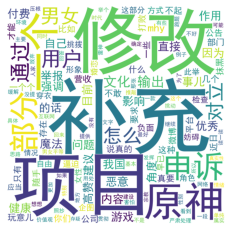

In [23]:
img = WordCloud(background_color="white",
                width=800,
                height=800,
                font_path='simhei.ttf',
                min_word_length=2).generate(cloud_text)
plt.figure(figsize=(800, 800))
fig, ax = plt.subplots()
ax.imshow(img)
ax.set_axis_off()
fig.savefig('D:/desktop/wordcloud.png', dpi=600)